In [27]:
"""ESTABLISH A CONNECTION WITH THE DEVICE"""
import vna
import matplotlib.pyplot as plt

IP = "192.168.3.51"
timeout = 25e3
max_npoints = 1e3
instrument = vna.ManageVNA(IP,timeout,max_npoints)

In [25]:
instrument.instr.query('CALC:FORMat PHASE;*OPC?')  #Display real part, in Linear scale

'1\n'

In [22]:
instrument.set_range(8.574e9,8.575e9)

In [26]:
instrument.set_sweep_points(200)

In [28]:
"""SET THE DESIRED PARAMETER BEFORE PERFORMING THE MEASUREMENTS"""
# Set [fmin,fmax] that is the frequency interval along which the scans are performed
fmin = 8.574e9
fmax = 8.575e9
powerdBm = -20 #dBm
npoints = 400
navgs = 1
# Set the power of the monotone waves sent into the port 1 to measure the selected matrix element (e.g. S21)
powerdBm = -15 #dBm
# Set the number of equally spaced frequencies in the interval [fmin,fmax] sampled at each scan
#npoints = 10001
# Set the number of sweeps performed (that is the number of measurements whose average is returned)
navgs = 1

In [ ]:
"""
PERFORM THE MEASURE
We call the single_scan() method with the above parameters.
The method returns:
-freq: an array containing the sampled equally spaced frequencies.
-I and Q: respectively the real and the imaginary part of the matrix element values corresponding to the frequencies in "freq".
"""
import numpy as np
instrument.set_IFBW(1e2)
freq, I, Q = instrument.single_scan(fmin,fmax,powerdBm,npoints,navgs,1)
S21dB = 20*np.log10(np.sqrt(np.multiply(I,I)+np.multiply(Q,Q)))
# Here we calculate the matrix element in dB, form its real and imaginary parts
plt.plot(freq,S21)

In [ ]:
"""
Perform AND SAVE the measure
"""
from many_instruments import *
filename = "24_05_BIASTEE_caldo_10001pts_1-14GHz.h5"
group = "10001pts_IFBW10kHz"
# instrument.reset()
# time.sleep(3)
# instrument.set_mode("NA")
# instrument.set_port("S21")
# instrument.set_IFBW(1e2)
# instrument.query_reset()
# time.sleep(1)
acquire_S21(instrument,fmin,fmax,powerdBm,npoints,navgs,filename,group,port="S22")


In [19]:
freq_nodrive,S21dbm_nodrive=instrument.read_data()  #Effectively reads what is displayed on the screen


In [ ]:
f,S21 = instrument.single_scan(5)

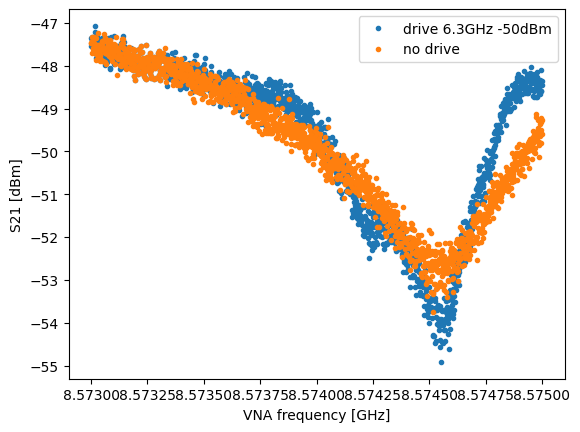

In [12]:
fig, ax = plt.subplots()
ax.plot(freq/1e9,S21dbm,'.',label='drive 6.3GHz -50dBm')
ax.plot(freq/1e9,S21dbm_nodrive,'.',label='no drive')
ax.set_xlabel('VNA frequency [GHz]')
ax.set_ylabel('S21 [dBm]')
#ax.set_title("Drive (SMA) power "+str(sma_pow)+"dBm")
ax.legend()

In [20]:
from h5py import *
from h5utils import *

"""Save a dataset"""
filename_save = "9_06_drive_and_nodrive_30Hz.h5"
full_dataset_path = "/PHASE/no_drive"

mat = [freq, S21dbm_nodrive]
hf = h5py.File(filename_save, 'a')
hf.create_dataset(full_dataset_path, data = mat)
hf.close()